In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv("./data/salary/train.csv")
test = pd.read_csv("./data/salary/test.csv")

### 데이터 탐색

In [4]:
display('Train')
display(train.head(10))
display('Test')
display(test.head())

'Train'

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
5,6,66,Self-emp-not-inc,274451,9th,5,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,25,United-States,1
6,7,56,Private,152874,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,1741,40,United-States,0
7,8,70,Self-emp-not-inc,165586,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,0
8,9,21,Private,211013,Assoc-voc,11,Married-civ-spouse,Other-service,Other-relative,White,Female,0,0,50,Mexico,0
9,10,33,Private,192644,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Puerto-Rico,0


'Test'

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
1,29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
2,29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
3,29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [26]:
train['marital-status'].value_counts()

 Married-civ-spouse       13331
 Never-married             9673
 Divorced                  4030
 Widowed                    942
 Separated                  914
 Married-spouse-absent      394
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [5]:
display('Train')
display(train.shape)
display('Test')
display(test.shape)

'Train'

(29305, 16)

'Test'

(19537, 15)

In [6]:
display('Train')
display(train.info())
display('Test')
display(test.info())

'Train'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


None

'Test'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       19537 non-null  object
 3   fnlwgt          19537 non-null  int64 
 4   education       19537 non-null  object
 5   education-num   19537 non-null  int64 
 6   marital-status  19537 non-null  object
 7   occupation      19537 non-null  object
 8   relationship    19537 non-null  object
 9   race            19537 non-null  object
 10  sex             19537 non-null  object
 11  capital-gain    19537 non-null  int64 
 12  capital-loss    19537 non-null  int64 
 13  hours-per-week  19537 non-null  int64 
 14  native-country  19537 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.2+ MB


None

In [7]:
train.describe()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,14653.000000,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,8459.769156,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7327.000000,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,14653.000000,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,21979.000000,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,29305.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
train[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,29305,29305,29305,29305,29305,29305,29305,29305
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,20410,9435,13331,3724,11769,25081,19621,26301


#### 단순 관계성

In [9]:
train.corr()['age']
# 나이가 많을 수록 수입이 높음

no                0.001111
age               1.000000
fnlwgt           -0.075753
education-num     0.035084
capital-gain      0.078498
capital-loss      0.054413
hours-per-week    0.073100
income            0.238460
Name: age, dtype: float64

In [10]:
train.corr()['education-num']
# 교육수준이 높을수록 capital-gain, hours-per-week, income 이 높음

no               -0.008466
age               0.035084
fnlwgt           -0.030600
education-num     1.000000
capital-gain      0.127651
capital-loss      0.083925
hours-per-week    0.147569
income            0.331798
Name: education-num, dtype: float64

In [11]:
train.corr()['income']
# 수입이 높을수록 age, capital-gain, capital-loss, hours-per-week

no               -0.004080
age               0.238460
fnlwgt           -0.002994
education-num     0.331798
capital-gain      0.221387
capital-loss      0.135645
hours-per-week    0.231045
income            1.000000
Name: income, dtype: float64

#### 성별과 학력에 따른 임금격차

In [12]:
data_sex = train[['sex', 'education-num','income']].groupby(['sex', 'education-num']).mean()

In [13]:
train[['sex', 'education-num','income']].groupby(['sex', 'education-num']).sum()

income
sex     education-num        
 Female 1                   0
        2                   0
        3                   1
        4                   1
        5                   3
        6                   1
        7                   7
        8                   1
        9                 201
        10                177
        11                 52
        12                 49
        13                309
        14                173
        15                 44
        16                 39
 Male   1                   0
        2                   2
        3                  15
        4                  43
        5                  20
        6                  41
        7                  54
        8                  26
        9                1309
        10               1080
        11                264
        12                205
        13               1689
        14                690
        15                331
        16                218

<AxesSubplot:xlabel='sex,education-num'>

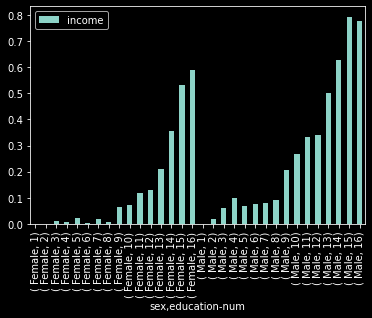

In [14]:
train[['sex', 'education-num','income']].groupby(['sex', 'education-num']).mean().plot(kind='bar')
#  남녀에 따른 임금 격차가 큼을 나타냄 

<AxesSubplot:xlabel='education-num', ylabel='count'>

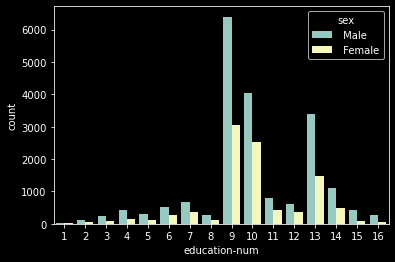

In [15]:
sns.countplot(data=train, x='education-num', hue='sex' )
# 남녀에 따른 최종학력도 차이남

<AxesSubplot:xlabel='sex', ylabel='age'>

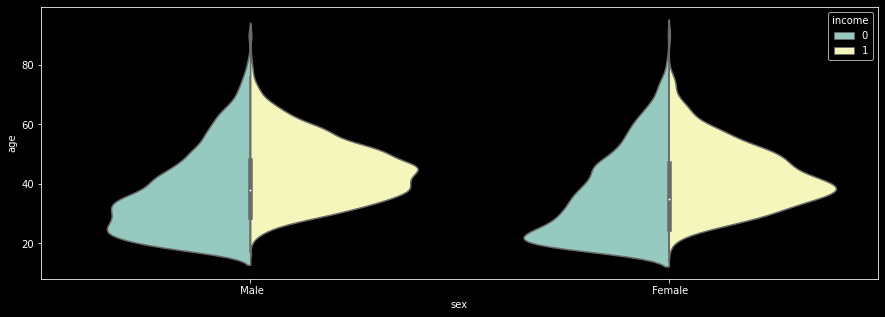

In [16]:
plt.figure(figsize=(15,5))
sns.violinplot(data = train, 
               x = 'sex',
               y = 'age',
               hue = 'income', 
               split = True)

<AxesSubplot:xlabel='sex', ylabel='education-num'>

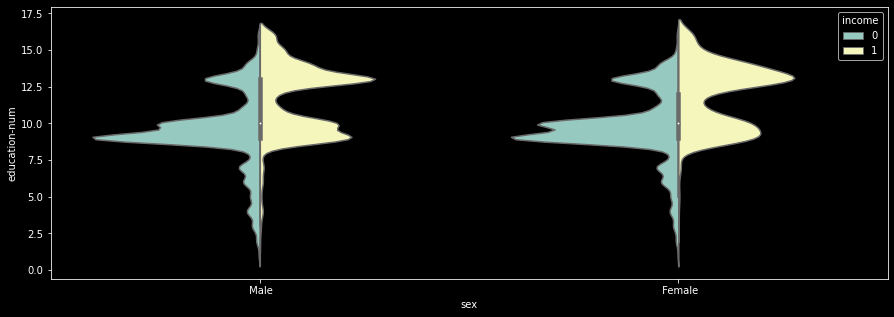

In [17]:
plt.figure(figsize=(15,5))
sns.violinplot(data = train, 
              x = 'sex',
              y = 'education-num',
              hue = 'income', 
              split = True)

#### 나이와 학력에 따른 임금 격차

<AxesSubplot:xlabel='age', ylabel='Density'>

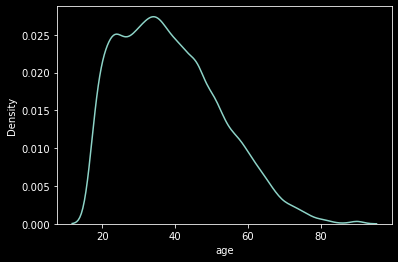

In [18]:
#연령분포 확인
sns.kdeplot(train['age'])

<AxesSubplot:>

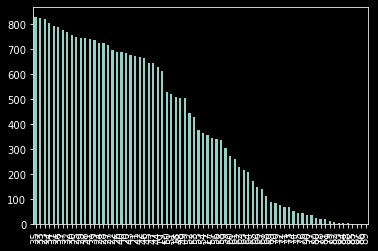

In [19]:
train['age'].value_counts().plot(kind='bar')

<AxesSubplot:>

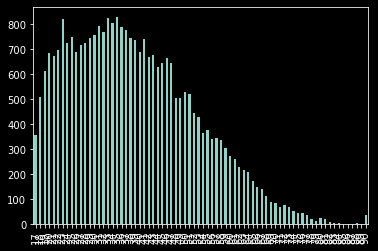

In [20]:
train['age'].value_counts().sort_index().plot(kind='bar')

In [21]:
train['age'].describe()

count    29305.000000
mean        38.659171
std         13.743827
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [22]:
test['age'].describe()

count    19537.000000
mean        38.620208
std         13.660701
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [23]:
train[['age','income']].groupby(['age']).mean().plt(kind='line')
# 40, 50대의 수입이 높고 80,90대의 경우 이상치로 평균이 높은 특정 사람이 있음

AttributeError: 'DataFrame' object has no attribute 'plt'

In [ ]:
train[train['age']>=80][['age','income']]
# train[train['age']>=80][['age','income']][train['income']==1].count()
# 110명 중 18명 만 50k이상 수입 
# group지어지면서 평균의 오류 생김 저 나이대를 크게 분류할 필요가 있음

,age,income
477,90,0
709,90,0
1121,80,0
1669,80,1
1891,90,1
...,...,...
28046,89,0
28395,90,0
28483,82,0
29048,80,0


In [ ]:
#train[train['age']>=80][['age','education-num']].sort_values(by='education-num')
train[train['age']>=80][['age','education-num']][train['education-num']>=9]
# 110 명중 82명이 고학력

C:\Users\aischool\AppData\Local\Temp\ipykernel_6528\3432152283.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['age']>=80][['age','education-num']][train['education-num']>=9]


,age,education-num
477,90,9
709,90,9
1121,80,9
1669,80,15
1891,90,12
...,...,...
28046,89,13
28395,90,9
28483,82,10
29048,80,16


In [ ]:
train[train['age']>=80][['age','education-num','income']][train['education-num']>=9][train['income']==1].count()
# 110명중 16명만 50k이상 소득 상단에서 나왔던 고소득 고령인구 18명중 16명이 고학력자
# 연령층이 높을수록 학력 영향을 더 많이 받음 

C:\Users\aischool\AppData\Local\Temp\ipykernel_6528\1893291727.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['age']>=80][['age','education-num','income']][train['education-num']>=9][train['income']==1].count()


age              16
education-num    16
income           16
dtype: int64

#### native-country 컬럼 분석 & 처리
- native-country에 해당하는 income이 대륙별로 통계내기는 좀 무의미해 보임
- 결측치만을 따로 뒀을때 income의 평균이나 수적 비율도 전체와 결측치가 비슷 
- 굳이 결측치를 어느 그룹에 넣을 필요 없을듯 or 'United-States'정도에 넣을면 좋을듯 

In [ ]:
train[['native-country','income']].groupby(['native-country']).mean().sort_values(by='income')


,income
native-country,
Trinadad&Tobago,0.000000
Holand-Netherlands,0.000000
Vietnam,0.020000
Nicaragua,0.035714
Columbia,0.037736
Guatemala,0.039216
Dominican-Republic,0.049180
El-Salvador,0.052083
Mexico,0.053541


In [ ]:
train['income'].value_counts()


0    22260
1     7045
Name: income, dtype: int64

In [ ]:
train[train['native-country']==" ?"][['income']].value_counts()

income
0         378
1         117
dtype: int64

In [ ]:
train[train['native-country']==" United-States"][['income']].value_counts()

income
0         19834
1          6467
dtype: int64

In [ ]:
train[['native-country','income']].describe()

,income
count,29305.000000
mean,0.240403
std,0.427335
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### 'marital-status'와 '' 컬럼 분석& 처리
- 결측치 없음
- 배우자 유무가 소득을 크게 올림 
- 의외로 자식이 있을때 소득 너무 낮음

In [ ]:
train[train['marital-status']==" ?"]

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
train[train['relationship']==" ?"]

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
train[['marital-status','income']].groupby(['marital-status']).mean().sort_values(by='income')

,income
marital-status,
Never-married,0.046831
Separated,0.067834
Widowed,0.083864
Married-spouse-absent,0.093909
Divorced,0.104467
Married-AF-spouse,0.380952
Married-civ-spouse,0.448954


In [ ]:
train[['relationship','income']].groupby(['relationship']).mean().sort_values(by='income')

,income
relationship,
Own-child,0.014273
Other-relative,0.035398
Unmarried,0.060567
Not-in-family,0.105146
Husband,0.452035
Wife,0.466423


In [ ]:
train[train['relationship']==" Own-child"][['income']].value_counts()

income
0         4489
1           65
dtype: int64

#### 'occupation' 분석 & 처리
- 결측치 부분이 평균에서 크게 낮음
- 방법1 결측치 처리 모델 만드는 법
- 방법2 3~4그룹으로 나누자(결측치 필요 없음)

In [ ]:
train[train['occupation']==' ?'][['occupation','income']].mean()

C:\Users\aischool\AppData\Local\Temp\ipykernel_6528\3366835811.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train['occupation']==' ?'][['occupation','income']].mean()


income    0.104916
dtype: float64

In [ ]:
train[['occupation','income']].groupby(['occupation']).mean().sort_values(by='income')

,income
occupation,
Priv-house-serv,0.020548
Other-service,0.043361
Handlers-cleaners,0.066453
?,0.104916
Farming-fishing,0.106982
Machine-op-inspct,0.131971
Adm-clerical,0.133140
Transport-moving,0.202441
Craft-repair,0.225771


In [ ]:
train[train['occupation']==' ?'][['native-country']].value_counts(normalize=True)

native-country  
 United-States      0.907074
 ?                  0.018585
 Mexico             0.015588
 Canada             0.008993
 South              0.006595
 Puerto-Rico        0.004796
 Germany            0.004796
 Taiwan             0.004197
 Philippines        0.004197
 El-Salvador        0.003597
 Haiti              0.002998
 England            0.001799
 Portugal           0.001799
 Poland             0.001799
 China              0.001799
 Jamaica            0.001199
 Italy              0.001199
 India              0.001199
 Hong               0.001199
 France             0.001199
 Japan              0.000600
 Cambodia           0.000600
 Nicaragua          0.000600
 Hungary            0.000600
 Cuba               0.000600
 Columbia           0.000600
 Thailand           0.000600
 Trinadad&Tobago    0.000600
 Ireland            0.000600
dtype: float64

In [ ]:
train[['native-country']].value_counts(normalize=True)

native-country             
 United-States                 0.897492
 Mexico                        0.019758
 ?                             0.016891
 Philippines                   0.006074
 Germany                       0.004231
 Puerto-Rico                   0.003992
 Canada                        0.003788
 El-Salvador                   0.003276
 Cuba                          0.003208
 India                         0.003071
 England                       0.002559
 South                         0.002525
 Jamaica                       0.002320
 China                         0.002320
 Dominican-Republic            0.002082
 Italy                         0.002047
 Japan                         0.001843
 Columbia                      0.001809
 Poland                        0.001809
 Haiti                         0.001740
 Guatemala                     0.001740
 Vietnam                       0.001706
 Portugal                      0.001467
 Taiwan                        0.001331
 Iran       

In [ ]:
train[train['occupation']==' ?'][['relationship']].value_counts(normalize=True)

relationship   
 Own-child         0.309952
 Husband           0.254197
 Not-in-family     0.239209
 Unmarried         0.091727
 Wife              0.069544
 Other-relative    0.035372
dtype: float64

In [ ]:
train[['relationship']].value_counts(normalize=True)

relationship   
 Husband           0.401604
 Not-in-family     0.260604
 Own-child         0.155400
 Unmarried         0.104794
 Wife              0.046750
 Other-relative    0.030848
dtype: float64

#### 'race' 분석 & 처리 
- 결측치 없음
- Amer-Indian-Eskimo, Black, Other -> income 평균치에 훨씬 밑도는 수준
- Asian-Pac-Islander, White -> income 평균치

In [ ]:
train[['race','income']].groupby(['race']).mean().sort_values(by='income')

,income
race,
Other,0.117155
Black,0.118516
Amer-Indian-Eskimo,0.124138
Asian-Pac-Islander,0.255713
White,0.255851


In [ ]:
train[train['race']==' Other']['relationship'].value_counts(normalize=True)

 Husband           0.322176
 Not-in-family     0.259414
 Own-child         0.142259
 Other-relative    0.108787
 Unmarried         0.104603
 Wife              0.062762
Name: relationship, dtype: float64

In [ ]:
train['relationship'].value_counts(normalize=True)

 Husband           0.401604
 Not-in-family     0.260604
 Own-child         0.155400
 Unmarried         0.104794
 Wife              0.046750
 Other-relative    0.030848
Name: relationship, dtype: float64

In [ ]:
train[train['race']==' Black']['relationship'].value_counts(normalize=True)

 Not-in-family     0.269452
 Unmarried         0.243876
 Husband           0.207133
 Own-child         0.182277
 Other-relative    0.050793
 Wife              0.046470
Name: relationship, dtype: float64

In [ ]:
train[train['race']==' Amer-Indian-Eskimo']['relationship'].value_counts(normalize=True)

 Husband           0.286207
 Not-in-family     0.265517
 Unmarried         0.206897
 Own-child         0.127586
 Wife              0.068966
 Other-relative    0.044828
Name: relationship, dtype: float64

In [ ]:
train[train['race']==' Asian-Pac-Islander']['relationship'].value_counts(normalize=True)

 Husband           0.381937
 Not-in-family     0.216540
 Own-child         0.163221
 Other-relative    0.085963
 Unmarried         0.083787
 Wife              0.068553
Name: relationship, dtype: float64

In [ ]:
train[train['race']==' White']['relationship'].value_counts(normalize=True)

 Husband           0.425940
 Not-in-family     0.261194
 Own-child         0.152586
 Unmarried         0.088992
 Wife              0.045572
 Other-relative    0.025717
Name: relationship, dtype: float64

<AxesSubplot:xlabel='age'>

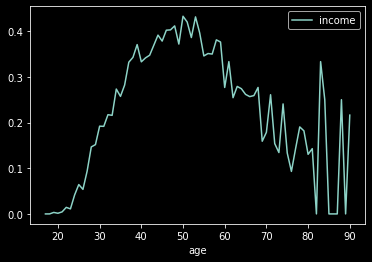

In [ ]:
train[['age','income']].groupby(['age']).mean().plot(kind='line')

<AxesSubplot:xlabel='age'>

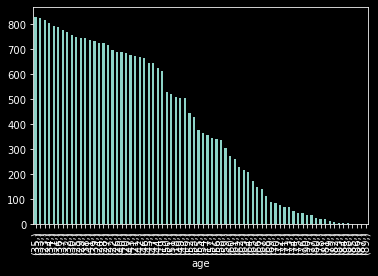

In [ ]:
train[['age']].value_counts().plot(kind='bar')

In [ ]:
train[train['age']<20][train['income']==1].count()['age'],train[train['age']<20].count()['age']

C:\Users\aischool\AppData\Local\Temp\ipykernel_6528\3593007134.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['age']<20][train['income']==1].count()['age'],train[train['age']<20].count()['age']


(2, 1479)

In [ ]:
train[train['age']<25][train['income']==1].count()['age']-train[train['age']<=20][train['income']==1].count()['age']

C:\Users\aischool\AppData\Local\Temp\ipykernel_6528\2727660656.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['age']<25][train['income']==1].count()['age']-train[train['age']<=20][train['income']==1].count()['age']


52

In [ ]:
train[train['age']<25].count()['age']-train[train['age']<=20].count()['age']

2910

In [ ]:
# 초과 이하
age_all=[]
age_income=[]
age=[]
for i in range(15,101,5):
    a=train[train['age']<=i+5].count()['age']-train[train['age']<i].count()['age']
    age_all.append(a)
    b=train[train['age']<=i+5][train['income']==1].count()['age']-train[train['age']<i][train['income']==1].count()['age']
    age_income.append(b)
    age.append(str(i)+'~'+str(i+5))

C:\Users\aischool\AppData\Local\Temp\ipykernel_6528\1465039564.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=train[train['age']<=i+5][train['income']==1].count()['age']-train[train['age']<i][train['income']==1].count()['age']


In [ ]:
data=pd.DataFrame([age_all,age_income], columns=age).T
data

,0,1
15~25,5819,103
25~35,8396,1446
35~45,7912,2672
45~55,5618,2241
55~65,3052,993
65~75,1056,237
75~85,221,30
85~95,46,9
95~105,0,0


In [ ]:
data1=pd.DataFrame([age_all,age_income], columns=age).T
data1

,0,1
15~20,2162,3
20~25,4340,101
25~30,4376,516
30~35,4775,1075
35~40,4558,1449
40~45,4042,1452
45~50,3485,1392
50~55,2660,1077
55~60,1968,686
60~65,1355,382


In [ ]:
data[2]=data[1]/data[0]
data

,0,1,2
15~25,5819,103,0.017701
25~35,8396,1446,0.172225
35~45,7912,2672,0.337715
45~55,5618,2241,0.398896
55~65,3052,993,0.325360
65~75,1056,237,0.224432
75~85,221,30,0.135747
85~95,46,9,0.195652
95~105,0,0,NaN


In [ ]:
data1[2]=data1[1]/data1[0]
data1

,0,1,2
15~20,2162,3,0.001388
20~25,4340,101,0.023272
25~30,4376,516,0.117916
30~35,4775,1075,0.225131
35~40,4558,1449,0.317903
40~45,4042,1452,0.359228
45~50,3485,1392,0.399426
50~55,2660,1077,0.404887
55~60,1968,686,0.348577
60~65,1355,382,0.281919


In [ ]:
# 이상 미만
age_all_=[]
age_income_=[]
age_=[]
for i in range(15,101,5):
    a=train[train['age']<i+5].count()['age']-train[train['age']<=i].count()['age']
    age_all_.append(a)
    b=train[train['age']<i+5][train['income']==1].count()['age']-train[train['age']<=i][train['income']==1].count()['age']
    age_income_.append(b)
    age_.append(str(i)+'~'+str(i+5))

C:\Users\aischool\AppData\Local\Temp\ipykernel_6528\2008193253.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=train[train['age']<i+5][train['income']==1].count()['age']-train[train['age']<=i][train['income']==1].count()['age']


In [ ]:
data3=pd.DataFrame([age_all_,age_income_], columns=age_).T
data3

,0,1
15~20,1479,2
20~25,2910,52
25~30,2874,323
30~35,3192,717
35~40,3042,1007
40~45,2709,979
45~50,2313,920
50~55,1757,719
55~60,1321,481
60~65,912,262


In [ ]:
data3[2]=data3[1]/data3[0]
data3

,0,1,2
15~20,1479,2,0.001352
20~25,2910,52,0.017869
25~30,2874,323,0.112387
30~35,3192,717,0.224624
35~40,3042,1007,0.331032
40~45,2709,979,0.361388
45~50,2313,920,0.397752
50~55,1757,719,0.409220
55~60,1321,481,0.364118
60~65,912,262,0.287281
